In [24]:
import pandas as pd
df = pd.read_csv(r"C:\AI workforce\TCS\Retail_Transactions_2000.csv")
print(df.shape)        
    


(2000, 11)


In [25]:
df.info()    


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   TransactionID    2000 non-null   object
 1   CustomerID       2000 non-null   object
 2   Gender           2000 non-null   object
 3   Age              2000 non-null   int64 
 4   City             2000 non-null   object
 5   ProductCategory  2000 non-null   object
 6   Quantity         2000 non-null   int64 
 7   Price            2000 non-null   int64 
 8   PurchaseDate     2000 non-null   object
 9   PaymentMode      2000 non-null   object
 10  TotalAmount      2000 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 172.0+ KB


In [27]:
df.head()  

,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount
0,T00001,C2824,Female,33,Bengaluru,Fashion,3,4479,2023-03-15,Cash,13437
1,T00002,C1409,Other,20,Pune,Books,5,1051,2023-01-22,Card,5255
2,T00003,C5506,Other,47,Pune,Furniture,1,111,2023-04-18,Wallet,111
3,T00004,C5012,Other,21,Hyderabad,Groceries,5,2946,2023-08-09,Cash,14730
4,T00005,C4657,Female,41,Chennai,Sports,1,3123,2023-09-23,Wallet,3123


In [9]:
df.isnull().sum()


TransactionID      0
CustomerID         0
Gender             0
Age                0
City               0
ProductCategory    0
Quantity           0
Price              0
PurchaseDate       0
PaymentMode        0
TotalAmount        0
dtype: int64

In [11]:
duplicates = df.duplicated().sum()
print(f"{duplicates}")

0


In [12]:
print(df['Gender'].unique())
print(df['City'].unique()[:10])       
print(df['PaymentMode'].unique())


['Female' 'Other' 'Male']
['Bengaluru' 'Pune' 'Hyderabad' 'Chennai' 'Delhi' 'Jaipur' 'Lucknow'
 'Ahmedabad' 'Kolkata' 'Mumbai']
['Cash' 'Card' 'Wallet' 'UPI']


In [28]:
#PART A 2
print("Missing Age:", df['Age'].isnull().sum())   #no missing values, so i did'nt use median

Missing Age: 0


In [33]:

print("Missing City:", df['City'].isnull().sum())



Missing City: 0


In [35]:
df.dropna(subset=['TransactionID', 'ProductCategory'], inplace=True)

DATA CLEANING:

Remove Duplicate Transactions

In [36]:
print("Duplicate rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
df.shape

Duplicate rows: 0


(2000, 11)

 Cleaning Gender


In [38]:
df['Gender'] = df['Gender'].str.strip().str.title()
df['Gender'].replace({
    'M': 'Male',
    'F': 'Female',
    'O': 'Other'
}, inplace=True)
df

C:\Users\HP\AppData\Local\Temp\ipykernel_13592\1633333599.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace({


,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount
0,T00001,C2824,Female,33,Bengaluru,Fashion,3,4479,2023-03-15,Cash,13437
1,T00002,C1409,Other,20,Pune,Books,5,1051,2023-01-22,Card,5255
2,T00003,C5506,Other,47,Pune,Furniture,1,111,2023-04-18,Wallet,111
3,T00004,C5012,Other,21,Hyderabad,Groceries,5,2946,2023-08-09,Cash,14730
4,T00005,C4657,Female,41,Chennai,Sports,1,3123,2023-09-23,Wallet,3123
...,...,...,...,...,...,...,...,...,...,...,...
1995,T01996,C1151,Male,44,Jaipur,Fashion,2,2436,2023-01-15,Wallet,4872
1996,T01997,C5888,Male,53,Ahmedabad,Beauty,3,2744,2023-01-14,Wallet,8232
1997,T01998,C2758,Male,45,Lucknow,Electronics,1,3246,2023-06-19,Wallet,3246
1998,T01999,C6489,Male,43,Bengaluru,Sports,2,2709,2023-01-15,Wallet,5418


Cleaning City

In [ ]:
df['City'] = df['City'].str.strip().str.title()

Cleaning ProductCategory


In [39]:
df['ProductCategory'] = df['ProductCategory'].str.strip().str.title()


Cleaning PaymentMode


In [40]:
df['PaymentMode'] = df['PaymentMode'].str.strip().str.upper()

Correcting values

In [41]:
df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]


FEATURE EGINEERING
Derive TotalAmount if missing


In [ ]:
df['TotalAmount'] = df['Quantity'] * df['Price']


cleaning date columns

In [43]:
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'], errors='coerce')


Create AgeGroup column


In [44]:
bins = [0, 17, 25, 40, 60, 100]  
labels = ['<18', '18-25', '26-40', '41-60', '60+']

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)


 Encoding & Transformation
 Encoding categorical values:



In [49]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender_Enc'] = le.fit_transform(df['Gender'])
print(df[['Gender', 'Gender_Enc']].head())


   Gender  Gender_Enc
0  Female           0
1   Other           2
2   Other           2
3   Other           2
4  Female           0


In [50]:
df = pd.get_dummies(df, 
                    columns=['City', 'ProductCategory', 'PaymentMode'], 
                    drop_first=True)



In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age', 'Price', 'TotalAmount']] = scaler.fit_transform(df[['Age', 'Price', 'TotalAmount']])



Final Verification

In [53]:
print(df.isnull().sum())
print((df['Quantity'] <= 0).sum())  
print((df['Price'] <= 0).sum())   
print(df.duplicated().sum())
df.to_csv("Retail_Cleaned.csv")


TransactionID                  0
CustomerID                     0
Gender                         0
Age                            0
Quantity                       0
Price                          0
PurchaseDate                   0
TotalAmount                    0
AgeGroup                       0
Gender_Enc                     0
City_Bengaluru                 0
City_Chennai                   0
City_Delhi                     0
City_Hyderabad                 0
City_Jaipur                    0
City_Kolkata                   0
City_Lucknow                   0
City_Mumbai                    0
City_Pune                      0
ProductCategory_Books          0
ProductCategory_Electronics    0
ProductCategory_Fashion        0
ProductCategory_Furniture      0
ProductCategory_Groceries      0
ProductCategory_Sports         0
PaymentMode_CASH               0
PaymentMode_UPI                0
PaymentMode_WALLET             0
dtype: int64
0
1004
0


PART B

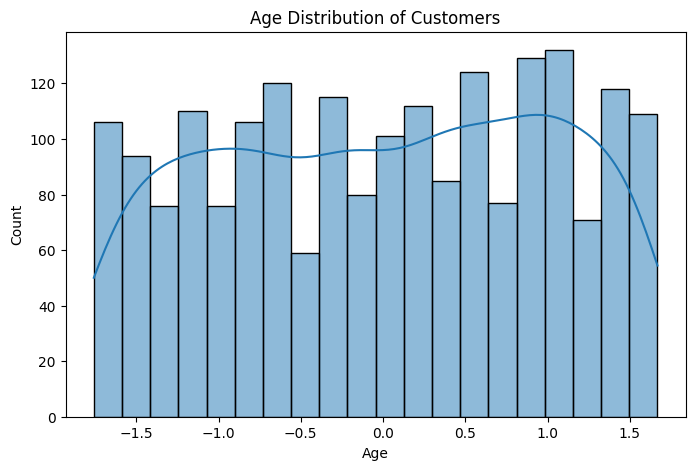

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=20, kde=True)  # kde=True draws smooth normal-like curve
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


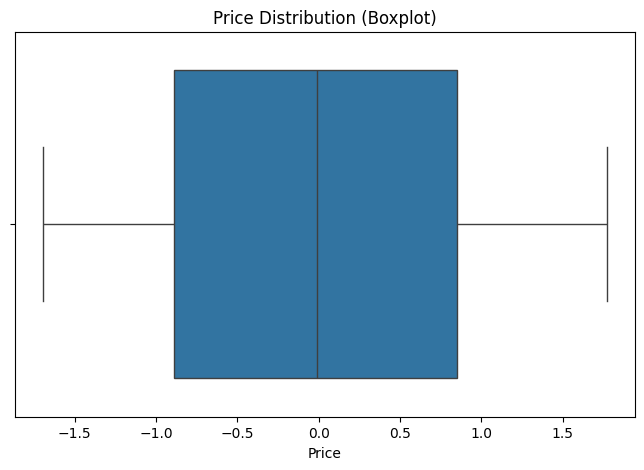

In [57]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Price'])
plt.title("Price Distribution (Boxplot)")
plt.show()




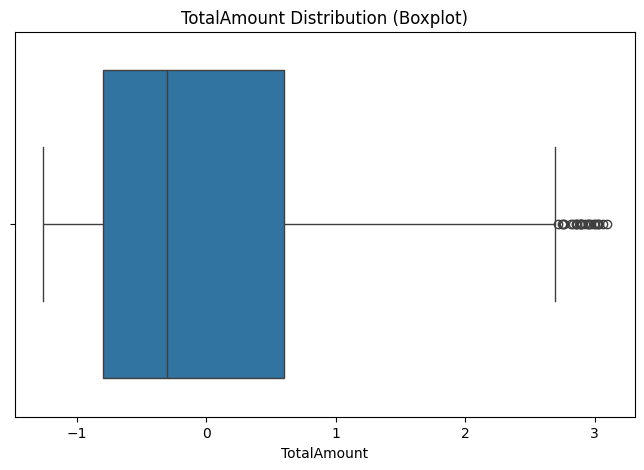

In [56]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['TotalAmount'])
plt.title("TotalAmount Distribution (Boxplot)")
plt.show()

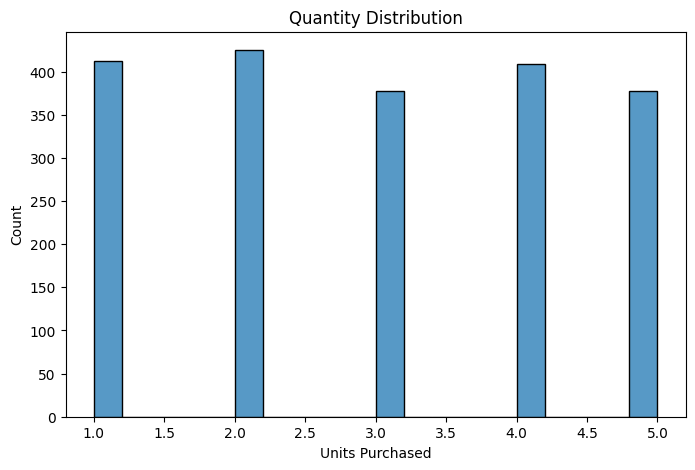

In [58]:
plt.figure(figsize=(8,5))
sns.histplot(df['Quantity'], bins=20, kde=False)
plt.title("Quantity Distribution")
plt.xlabel("Units Purchased")
plt.ylabel("Count")
plt.show()


In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()
